<a href="https://colab.research.google.com/github/rajafadhil/disney-reviews/blob/main/Disneyland_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI-Powered Insights from Disneyland Reviews: A Cross-Park Sentiment Analysis

## 1. Project Overview

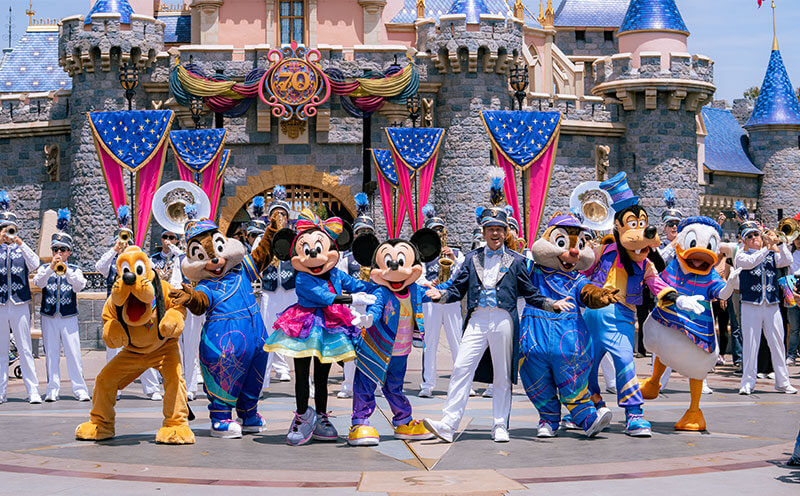

### Background

Disneyland merupakan salah satu destinasi rekreasi paling terkenal di dunia, dengan cabang utama yang tersebar di berbagai negara seperti Amerika Serikat (California), Prancis (Paris), dan Hong Kong. Jutaan pengunjung memberikan ulasan mereka di platform seperti TripAdvisor, menyampaikan pendapat mengenai pelayanan, fasilitas, harga, dan pengalaman secara keseluruhan.

Namun, dengan volume data yang besar dan bentuk data yang tidak terstruktur (teks), dibutuhkan pendekatan berbasis kecerdasan buatan untuk menggali insight berharga dari review tersebut.

### Problem Statement

* Bagaimana persepsi dan kepuasan pengunjung berbeda antar tiga cabang Disneyland (California, Paris, dan Hong Kong)?  
* Apa saja faktor utama yang membuat pengunjung merasa puas atau tidak puas?  
* Bagaimana model AI seperti LLM (Large Language Model) dapat digunakan untuk membantu memahami opini pengunjung secara otomatis dan efisien?

### Objectives

Proyek ini bertujuan untuk:
1. Menganalisis sentimen pengunjung terhadap tiga cabang Disneyland berdasarkan review teks.
2. Menyusun ringkasan otomatis dari kumpulan review menggunakan LLM (IBM Granite).
3. Mengidentifikasi insight utama (faktor positif dan negatif) dari review masing-masing cabang.
4. Memberikan rekomendasi konkret berdasarkan hasil analisis untuk pengelola Disneyland.

### Approach

Analisis akan dilakukan dengan pendekatan berikut:
- **Exploratory Data Analysis (EDA)**: untuk memahami struktur dan distribusi data
- **Sentiment Classification**: menggunakan model AI untuk mengklasifikasi review positif, netral, atau negatif
- **Summarization**: meringkas kumpulan review menjadi kesimpulan yang informatif per lokasi
- **Insight Extraction**: mengambil tema-tema utama dari review untuk masing-masing cabang

Untuk tugas-tugas pemrosesan bahasa alami (NLP), proyek ini menggunakan bantuan **LLM (Large Language Model)** berbasis IBM Granite, yang mampu memahami konteks dan emosi dalam review teks dengan lebih baik dibanding pendekatan tradisional.

### Dataset

Dataset yang digunakan berisi 42.000 review Disneyland yang dikumpulkan dari TripAdvisor. Setiap entri mencakup:
- `Review_ID`: ID unik untuk setiap review
- `Rating`: Skor kepuasan (1–5)
- `Year_Month`: Waktu kunjungan
- `Reviewer_Location`: Negara asal pengunjung
- `Review_Text`: Komentar pengunjung
- `Disneyland_Branch`: Lokasi Disneyland (California, Paris, Hong Kong)

Link dataset: https://www.kaggle.com/datasets/arushchillar/disneyland-reviews

# 2. Data Loading & Preprocessing

Pada tahap ini, data akan dimuat dan dipersiapkan untuk dianalisis. Tujuannya adalah memastikan data dalam kondisi bersih dan siap untuk digunakan pada tahap eksplorasi dan pemodelan AI. Beberapa langkah penting dalam preprocessing mencakup:

- Memuat dataset dari file CSV
- Memeriksa dan menangani missing values
- Standarisasi kolom tanggal, lokasi, dan rating
- Membersihkan teks review untuk keperluan analisis NLP:
  - Menghapus angka, tanda baca, dan karakter spesial
  - Lowercasing
  - Menghapus stopwords

Data yang sudah dibersihkan akan digunakan untuk analisis lanjutan, termasuk klasifikasi sentimen, summarization, dan ekstraksi insight menggunakan model LLM.


## Data Loading

In [ ]:
import pandas as pd

# Load dataset
file_path = 'DisneylandReviews.csv'
df = pd.read_csv(file_path, encoding='latin-1')

# Lihat 5 baris pertama
df.head()


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


## Cek Struktur dan Missing Value

In [ ]:
# Statistik Deskriptif
df.describe()

,Review_ID,Rating,Year_Month
count,4.265600e+04,42656.000000,40043
mean,3.188553e+08,4.217695,2015-05-17 01:34:15.280573440
min,1.398724e+06,1.000000,2010-03-01 00:00:00
25%,1.743274e+08,4.000000,2013-09-01 00:00:00
50%,2.907583e+08,5.000000,2015-07-01 00:00:00
75%,4.489579e+08,5.000000,2016-12-01 00:00:00
max,6.708014e+08,5.000000,2019-05-01 00:00:00
std,1.657092e+08,1.063371,NaN


In [ ]:
# Cek struktur kolom
df.info()

# Cek missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


,0
Review_ID,0
Rating,0
Year_Month,0
Reviewer_Location,0
Review_Text,0
Branch,0


## Membersihkan Review Text

In [ ]:
import re
import string

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    text = re.sub(r'\s+', ' ', text)  # hapus spasi ganda
    return text.strip()

df['Cleaned_Review'] = df['Review_Text'].apply(clean_text)

df[['Review_Text', 'Cleaned_Review']].head()

,Review_Text,Cleaned_Review
0,If you've ever been to Disneyland anywhere you...,if youve ever been to disneyland anywhere youl...
1,Its been a while since d last time we visit HK...,its been a while since d last time we visit hk...
2,Thanks God it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid when...
3,HK Disneyland is a great compact park. Unfortu...,hk disneyland is a great compact park unfortun...
4,"the location is not in the city, took around 1...",the location is not in the city took around ho...


## Stopwords Removal

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

df['Cleaned_Review'] = df['Cleaned_Review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 3. Exploratory Data Analysis (EDA)

Tahap EDA bertujuan untuk memahami distribusi, pola, dan tren dalam data review Disneyland sebelum diterapkan analisis AI. Beberapa aspek yang dianalisis antara lain:

- Distribusi rating secara keseluruhan dan per cabang
- Jumlah review berdasarkan waktu (bulan/tahun)
- Negara asal reviewer
- Perbedaan sentimen antar cabang berdasarkan skor
- Visualisasi kata-kata dominan pada review positif dan negatif

Analisis ini membantu untuk mengidentifikasi potensi insight dan membentuk hipotesis awal sebelum masuk ke pemodelan AI.

## Distribusi Rating Keseluruhan

/tmp/ipython-input-11-172365916.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


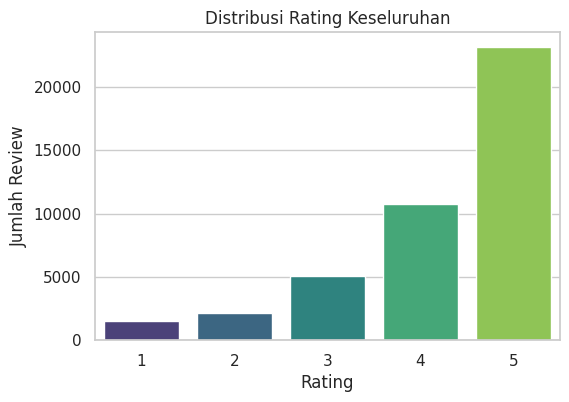

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style visualisasi
sns.set(style="whitegrid")

# Distribusi rating secara keseluruhan
plt.figure(figsize=(6,4))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribusi Rating Keseluruhan')
plt.xlabel('Rating')
plt.ylabel('Jumlah Review')
plt.show()

## Distribusi Rating per Cabang Disneyland

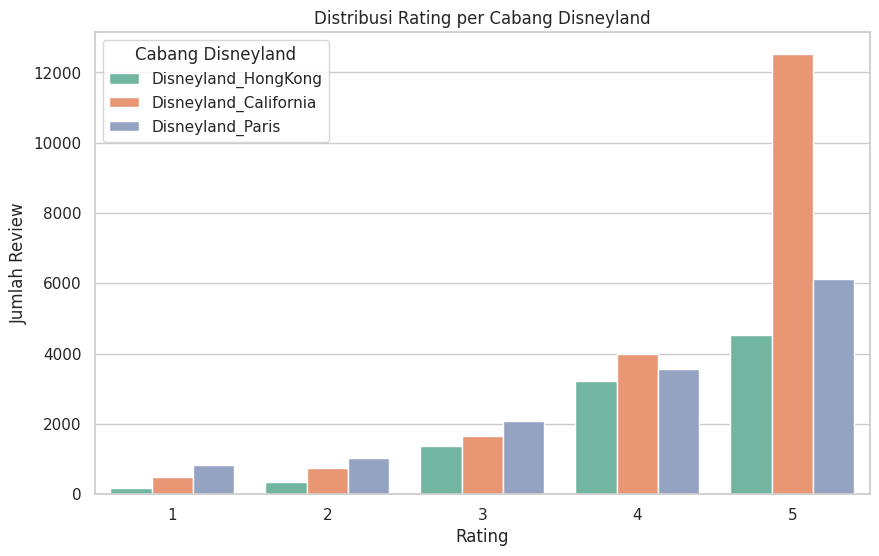

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Rating', hue='Branch', data=df, palette='Set2')
plt.title('Distribusi Rating per Cabang Disneyland')
plt.xlabel('Rating')
plt.ylabel('Jumlah Review')
plt.legend(title='Cabang Disneyland')
plt.show()

## Jumlah Review per Cabang

/tmp/ipython-input-14-356975096.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Branch', data=df, palette='pastel')


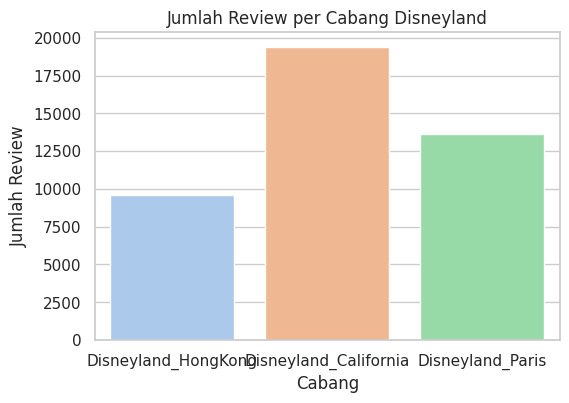

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Branch', data=df, palette='pastel')
plt.title('Jumlah Review per Cabang Disneyland')
plt.xlabel('Cabang')
plt.ylabel('Jumlah Review')
plt.show()

## Reviewer Location Terbanyak

/tmp/ipython-input-15-2839484461.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')


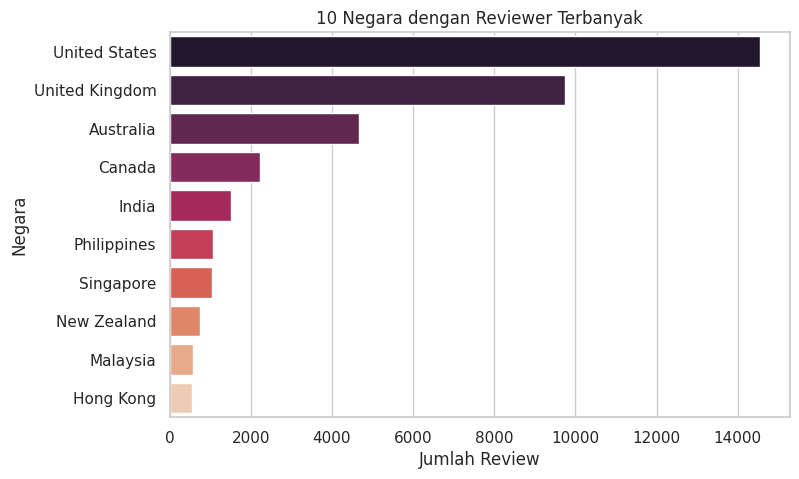

In [ ]:
top_countries = df['Reviewer_Location'].value_counts().nlargest(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')
plt.title('10 Negara dengan Reviewer Terbanyak')
plt.xlabel('Jumlah Review')
plt.ylabel('Negara')
plt.show()

## Jumlah Review per Tahun/Bulan

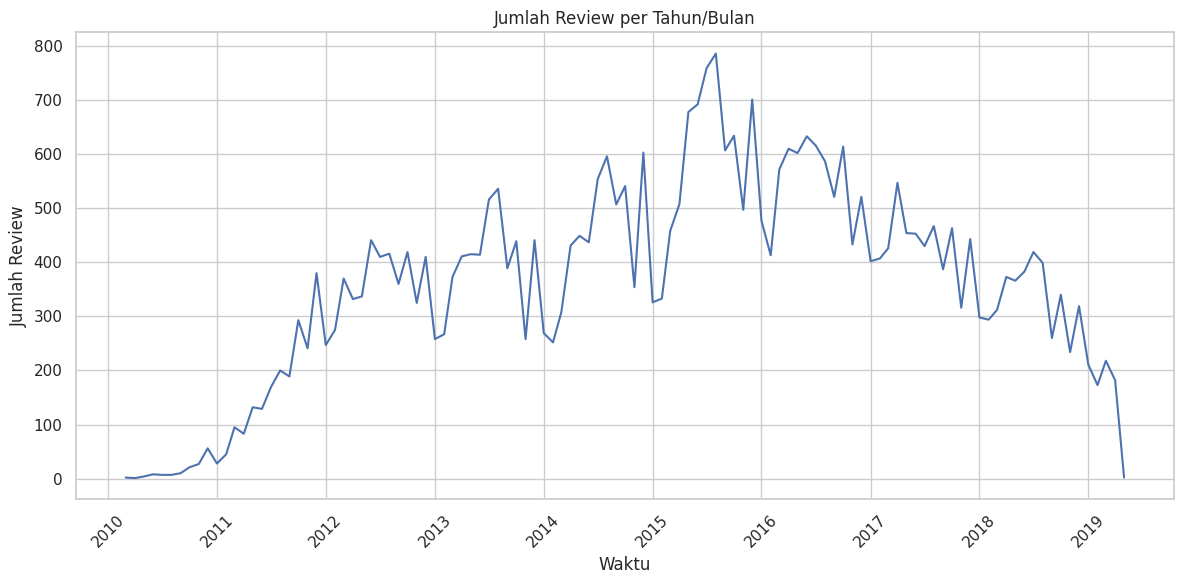

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Ubah kolom Year_Month menjadi datetime
df['Year_Month'] = pd.to_datetime(df['Year_Month'], format='%Y-%m')

# Hitung jumlah review per bulan
reviews_per_month = df.groupby('Year_Month').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Month', y='count', data=reviews_per_month)
plt.title('Jumlah Review per Tahun/Bulan')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Review')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## WordCloud untuk Review Positif vs Negatif

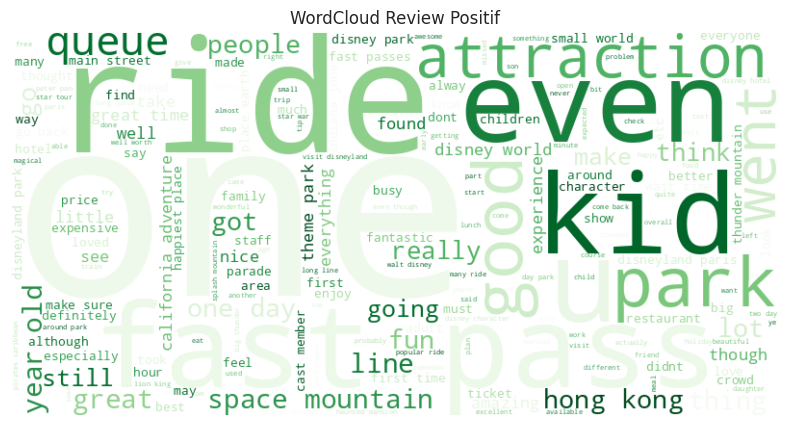

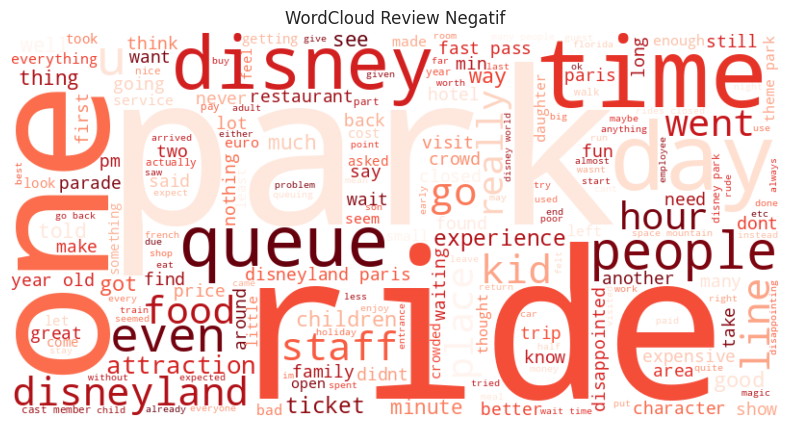

In [ ]:
from wordcloud import WordCloud

# Pisahkan review positif dan negatif
positive_reviews = df[df['Rating'] >= 4]['Cleaned_Review'].str.cat(sep=' ')
negative_reviews = df[df['Rating'] <= 2]['Cleaned_Review'].str.cat(sep=' ')

# WordCloud Positif
plt.figure(figsize=(10,5))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Review Positif')
plt.show()

# WordCloud Negatif
plt.figure(figsize=(10,5))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Review Negatif')
plt.show()

# 4. AI-based Analysis (IBM Granite LLM)

Pada bagian ini, analisis berbasis AI akan dilakukan menggunakan LLM (Large Language Model) IBM Granite. Model ini digunakan untuk memahami konteks dan emosi dari review teks yang kompleks dan panjang, sehingga dapat menggantikan teknik tradisional berbasis keyword atau rule.

### Tujuan AI Analysis:
1. Mengklasifikasikan sentimen dari review pengunjung secara otomatis (positif, netral, negatif)
2. Menyusun ringkasan dari kumpulan review untuk masing-masing cabang Disneyland
3. Mengekstraksi insight utama berupa keluhan dan pujian dari pengunjung secara tematik

Model LLM seperti IBM Granite memiliki keunggulan dalam memahami nuansa bahasa alami, termasuk ironi, sarkasme, dan konteks emosional yang sulit ditangkap oleh model klasik.


###  Tahap 1 — Sentiment Classification with IBM Granite


**Sentiment Classification using IBM Granite LLM via Replicate**

Untuk mengklasifikasikan sentimen review pengunjung Disneyland (positif, netral, negatif), digunakan Large Language Model (LLM) IBM Granite yang diakses melalui Replicate API.

Metode ini menggunakan pendekatan prompt-based classification, di mana setiap review dikirim ke model dengan prompt yang mengarahkan model untuk memberikan prediksi label sentimen.


Setup IBM Granite via Replicate

In [ ]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.65
    Uninstalling langchain-core-0.3.65:
      Successfully uninstalled langchain-core-0.3.65
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.25
    Uninstalling langchain-0.3.25:
      Successfully uninstalled langchain-0.3.25
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.1 MB/s eta 0:00:00


In [ ]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata  # Hanya bekerja di Colab

# Ambil dan set token
api_token = userdata.get('api_token2')  # token dari akun replicate
os.environ["REPLICATE_API_TOKEN"] = api_token

# Setup model IBM Granite
model = "ibm-granite/granite-3.3-8b-instruct"
llm = Replicate(model=model, replicate_api_token=api_token)

In [ ]:
# Uji pakai string statis
prompt = """Classify the sentiment of the following review into one of these categories: Positive, Neutral, Negative.

Review: "I really enjoyed my time in Disneyland California. The staff was friendly and the rides were amazing."

Sentiment:"""

print(llm.invoke(prompt))

Positive

Explanation:
The review explicitly expresses enjoyment of the reviewer's time at Disneyland California. They mention that the staff was friendly and the rides were amazing, both of which are positive attributes. Therefore, the sentiment of this review is classified as positive.


**Fungsi Prompt dan Klasifikasi Sentimen**

In [ ]:
# Fungsi buat prompt klasifikasi sentimen
def create_sentiment_prompt(review_text):
    return f"""Classify the sentiment of the following review into one of these categories: Positive, Neutral, Negative.

Review: "{review_text}"

Sentiment:"""

# Fungsi kirim prompt ke IBM Granite LLM
def classify_sentiment_llm(review_text):
    prompt = create_sentiment_prompt(review_text)
    try:
        response = llm.invoke(prompt)
        return response.strip()
    except Exception as e:
        return "Error"

In [ ]:
# Contoh uji coba review (pakai 1 dulu)
sample_review = df['Cleaned_Review'].iloc[0]
llm_prediction = classify_sentiment_llm(sample_review)

print("Review:")
print(sample_review)
print("\nPredicted Sentiment (LLM):", llm_prediction)

Review:
youve ever disneyland anywhere youll find disneyland hong kong similar layout walk main street familiar feel one rides small world absolutely fabulous worth day visited fairly hot relatively busy queues moved fairly well

Predicted Sentiment (LLM): Positive

Explanation: The review expresses a positive sentiment towards Disneyland Hong Kong. The user describes the layout as similar to Disneyland in other locations, mentions familiar elements like Main Street, and describes specific rides such as "Small World" as "absolutely fabulous" and "worth a visit." The reviewer also notes that, despite it being a hot day and the park being relatively busy with queues, they moved fairly well. These positive descriptions and the overall tone of the review indicate a favorable opinion of Disneyland Hong Kong.


In [ ]:
# Untuk efisiensi, tes pada subset kecil (30 review)
df_subset = df[['Review_ID', 'Cleaned_Review']].dropna().sample(30, random_state=42).copy()

# Jalankan prediksi
df_subset['LLM_Sentiment'] = df_subset['Cleaned_Review'].apply(classify_sentiment_llm)

df_subset[['Cleaned_Review', 'LLM_Sentiment']].head(10)

,Cleaned_Review,LLM_Sentiment
31092,disneyland beautiful largeto see need stay lea...,Positive\n\nThis review expresses a positive s...
28105,lines rides long yes fast passes help little s...,Negative. The review expresses dissatisfaction...
1121,loved hong kong disneyland although much small...,Positive\n\nExplanation: The review expresses ...
17687,love disneyland annual pass holders love nosta...,Positive\n\nExplanation: The review expresses ...
23059,california adventure park much improved additi...,Neutral. The review presents a mixed sentiment...
27910,disneyland doesnt need description course grea...,Sentiment: Negative\n\nExplanation: The review...
32841,deffinitely highlight light laser fireworks sh...,"Positive\n\nExplanation:\nThe review ""deffinit..."
18861,two key rides functioning properly morning vis...,Negative. The review details a series of issue...
42222,wife accompanied son wife two granddaughters y...,Positive\n\nExplanation:\nThe review describes...
16647,love disneyland glad go day new years eve frie...,Negative. The review expresses frustration wit...


### Tahap 2 – Review Summarization


Model LLM IBM Granite digunakan untuk meringkas sejumlah review sekaligus menjadi narasi singkat yang mudah dibaca. Ini bertujuan untuk membantu pemangku kebijakan mendapatkan gambaran umum tanpa harus membaca ribuan review.

Metode:
- Ambil 15 review dari masing-masing cabang Disneyland
- Gabungkan menjadi satu prompt
- Minta LLM membuat ringkasan dalam 2 kalimat

Model memahami konteks, tema, dan emosi dalam teks, sehingga menghasilkan ringkasan yang informatif dan bernuansa.


### California

In [ ]:
# Ambil 15 review dari Disneyland California
california_reviews = df[df['Branch'] == 'Disneyland_California']['Cleaned_Review'].dropna().sample(15, random_state=42)
combined_reviews = "\n- " + "\n- ".join(california_reviews.tolist())

summary_prompt = f"""
You are a helpful assistant. Summarize the following 15 customer reviews about Disneyland California in 2 concise and informative sentences.

Reviews:
{combined_reviews}

Summary:"""

print(summary_prompt[:1000])  # Lihat bagian awal prompt



You are a helpful assistant. Summarize the following 15 customer reviews about Disneyland California in 2 concise and informative sentences.

Reviews:

- yes disney expensive much fun everyone friendly get early skip ahead lines cant wait go back
- fun place along new adventure park next door first time ever disneyland within walking distance hotel hotel menage south harbor boulevard close drove la hired car alamo rentals west katella street mins walk disneyland opposite direction hotel menage
- great park lots fun everyone wonderful time disney world pass holder found new discoveries
- never bad experience disneyland famed disney customer service made sure able go birthday got spoiled characters wishing happy birthday people rides even fellow guests sure food park spendy lines crazy long theres ton people sheer fact wondering amongst sleeping beautys castle davvy crocketts stomping grounds mickey mouses home definitely overrides nothing beats disney parade fireworks show please talk 

In [ ]:
## Kirim ke LLM & Cetak Hasil

try:
    summary_response = llm.invoke(summary_prompt)
    print("Summary Output:\n", summary_response.strip())
except Exception as e:
    print("Error:", e)

Summary Output:
 Disneyland California is consistently praised for its fun, friendly atmosphere, and iconic rides, with many guests noting the value of the FastPass system to avoid long lines. The park's cleanliness, exceptional customer service, and magical ambiance, including the renowned parades and fireworks, are frequently highlighted. Visitors appreciate the variety of dining options and shops, though they often comment on the high cost of food and souvenirs. Some reviews mention overcrowding, particularly during school holidays and peak seasons, leading to long wait times for rides and a less comfortable experience. The expansion and improvement of California Adventure Park are noted, suggesting Disneyland remains a must-visit for both Disney enthusiasts and first-time visitors. Despite occasional hiccups, like misplaced FastPass incidents or construction affecting certain areas, the overall sentiment is overwhelmingly positive, with many guests expressing a desire to return.


### Paris

In [ ]:
# Ambil 15 review dari Disneyland Paris
paris_reviews = df[df['Branch'] == 'Disneyland_Paris']['Cleaned_Review'].dropna().sample(15, random_state=42)
combined_reviews = "\n- " + "\n- ".join(paris_reviews.tolist())

summary_prompt = f"""
You are a helpful assistant. Summarize the following 15 customer reviews about Disneyland Paris in 2 concise and informative sentences.

Reviews:
{combined_reviews}

Summary:"""

print(summary_prompt[:1000])  # Lihat bagian awal prompt



You are a helpful assistant. Summarize the following 15 customer reviews about Disneyland Paris in 2 concise and informative sentences.

Reviews:

- avoid queues go weekdays definitely ride space mountain mission tried agrabah restaurant average buffet
- husband visited day best time must perfect time year go didnt wait minutes ride trouble getting lunch without reservation getting train breeze fun day cant recommend enough even youre kid less like
- twice july november people would think july warm sunny would great time visit however thats biggest mistake contrary november much better time bear cold issue went july rides queues insane hour even spoilt entire time top extremely hot paris isnt equipped hot summers gone november park amazing queues max mins rare mins restaurants crowded amazing experience could also see parade almost invisible july due rush main reason f visit disneyland dont come rush seasons
- first went eurodisney called opened stayed newport bay club hotel days grea

In [ ]:
## Kirim ke LLM & Cetak Hasil

try:
    summary_response = llm.invoke(summary_prompt)
    print("Summary Output:\n", summary_response.strip())
except Exception as e:
    print("Error:", e)

Summary Output:
 Disneyland Paris received mixed reviews, with visitors praising its magic and atmosphere while noting some operational issues. Many reviewers advise visiting on weekdays to avoid long queues, with July being particularly busy and crowded. November is recommended for a less crowded and cooler experience. The park's hotel options, like the Santa Fe and Newport Bay, are appreciated, especially for families with young children. Food and drink prices are considered high, both inside the park and at external dining options. The FastPass system is utilized to bypass long lines, though some found it outdated compared to other Disney parks. Staff are generally helpful, though a few reviewers noted indifference. Cleanliness is generally up to Disney standards, though toilets could be better maintained. The park's organization and handling of large crowds are commended, but attractions sometimes close for maintenance. The fireworks and parades are highlighted as spectacular, espe

### Hong Kong

In [ ]:
# Ambil 15 review dari Disneyland Hong Kong
hk_reviews = df[df['Branch'] == 'Disneyland_HongKong']['Cleaned_Review'].dropna().sample(15, random_state=42)
combined_reviews = "\n- " + "\n- ".join(hk_reviews.tolist())

summary_prompt = f"""
You are a helpful assistant. Summarize the following 15 customer reviews about Disneyland Hong Kong in 2 concise and informative sentences.

Reviews:
{combined_reviews}

Summary:"""

print(summary_prompt[:1000])  # Lihat bagian awal prompt


You are a helpful assistant. Summarize the following 15 customer reviews about Disneyland Hong Kong in 2 concise and informative sentences.

Reviews:

- first time disneyland magic sprinkled way around parkas usual family always gets scariest ride first space ride dark rollacoasterwe enjoyed lion king show adventureland spent good hrs park til pm left light showwe got picture mickey mousemickey gave cuddle told watched show kid years agothey say disneyland usa much bigger us hong kong disney big enough get around one day kid always kid say place anything happenjust believe
- disneyland truly happiest place earth brings kid us spent rd birthday despite rain first part day disneyland disappoint loved shows thoroughly enjoyed grew disney hearing songs sung live joy festival lion king golden mickeys great heard quite time surprised could still sing along lyrics chorus cast members talented good looking wished understood saying golden mickeys chinese throughout show sat right side theatre 

In [ ]:
## Kirim ke LLM & Cetak Hasil

try:
    summary_response = llm.invoke(summary_prompt)
    print("Summary Output:\n", summary_response.strip())
except Exception as e:
    print("Error:", e)

Summary Output:
 Disneyland Hong Kong is generally regarded as a magical and enjoyable experience for families, particularly for young children, despite its smaller size compared to Disneyland USA and Orlando. Visitors appreciate the variety of rides, including thrilling ones like Space Mountain and the Racer, as well as family-friendly options such as the Jungle River Cruise and Mystic Manor. The Lion King show is consistently praised for its talent and engagement. While some find the food options reasonably priced, others note the quality could be better. The park's accessibility via the MTR is commended, and the weather can be a factor, with some visitors finding it cold, especially for a tropical country. Queue times are generally short, allowing for multiple ride experiences in a single day. Despite occasional rain, the parade and fireworks are highlights. Visitors express a desire for more rides suitable for teenagers and improved food quality. Overall, despite minor drawbacks, t

### Tahap 3 – Insight Extraction (Pujian & Keluhan)

LLM digunakan untuk mengekstrak **temuan kualitatif utama** dalam bentuk pujian dan keluhan dari review pengunjung. Ini berguna bagi pengelola untuk mengetahui apa saja kekuatan dan kelemahan layanan mereka secara spesifik.

Metode:
- Gabungkan 20 review dari masing-masing cabang Disneyland
- Gunakan prompt untuk meminta LLM mencari pola/tema yang sering muncul
- Minta output dalam format daftar pujian dan keluhan

### California

In [ ]:
# Ambil 20 review dari Disneyland California
california_reviews = df[df['Branch'] == 'Disneyland_California']['Cleaned_Review'].dropna().sample(20, random_state=42)
combined_california = "\n- " + "\n- ".join(california_reviews.tolist())

insight_prompt = f"""
From the following Disneyland California customer reviews, identify:

1. The top 3 most frequent **complaints**
2. The top 3 most frequent **praises**

Reviews:
{combined_california}

Output format:
Complaints:
1. ...
2. ...
3. ...

Praises:
1. ...
2. ...
3. ...
"""

print(insight_prompt[:1000])  # Potong jika terlalu panjang



From the following Disneyland California customer reviews, identify:

1. The top 3 most frequent **complaints**
2. The top 3 most frequent **praises**

Reviews:

- yes disney expensive much fun everyone friendly get early skip ahead lines cant wait go back
- fun place along new adventure park next door first time ever disneyland within walking distance hotel hotel menage south harbor boulevard close drove la hired car alamo rentals west katella street mins walk disneyland opposite direction hotel menage
- great park lots fun everyone wonderful time disney world pass holder found new discoveries
- never bad experience disneyland famed disney customer service made sure able go birthday got spoiled characters wishing happy birthday people rides even fellow guests sure food park spendy lines crazy long theres ton people sheer fact wondering amongst sleeping beautys castle davvy crocketts stomping grounds mickey mouses home definitely overrides nothing beats disney parade fireworks show pl

In [ ]:
## Kirim ke LLM & Cetak Hasil

try:
    insight_response = llm.invoke(insight_prompt)
    print("Extracted Insights:\n", insight_response.strip())
except Exception as e:
    print("Error:", e)


Extracted Insights:
 ### Complaints:

1. **High Prices**: Many reviews mention that Disneyland is expensive, with food, drinks, and merchandise being particularly costly.
2. **Long Lines and Wait Times**: Recurring complaints include extremely long wait times for rides, often averaging an hour per ride, making it challenging to experience everything.
3. **Overcrowding**: Visitors frequently express frustration with the park's overcrowding, especially during peak times and school holidays, which leads to long lines and a less enjoyable experience.

### Praises:

1. **Exceptional Customer Service**: Reviews consistently highlight the fantastic and attentive customer service provided by Disneyland staff, ensuring guests have a memorable experience, especially for special occasions like birthdays.
2. **Magical Atmosphere and Rides**: The enchanting atmosphere, immersive rides, and the overall fun factor are highly praised. Specific mentions include the Pirates of the Caribbean ride, the Do

### Paris

In [ ]:
# Ambil 20 review dari Disneyland Paris
paris_reviews = df[df['Branch'] == 'Disneyland_Paris']['Cleaned_Review'].dropna().sample(20, random_state=42)
combined_paris = "\n- " + "\n- ".join(paris_reviews.tolist())

insight_prompt = f"""
From the following Disneyland Paris customer reviews, identify:

1. The top 3 most frequent **complaints**
2. The top 3 most frequent **praises**

Reviews:
{combined_paris}

Output format:
Complaints:
1. ...
2. ...
3. ...

Praises:
1. ...
2. ...
3. ...
"""

print(insight_prompt[:1000])  # Potong jika terlalu panjang



From the following Disneyland Paris customer reviews, identify:

1. The top 3 most frequent **complaints**
2. The top 3 most frequent **praises**

Reviews:

- avoid queues go weekdays definitely ride space mountain mission tried agrabah restaurant average buffet
- husband visited day best time must perfect time year go didnt wait minutes ride trouble getting lunch without reservation getting train breeze fun day cant recommend enough even youre kid less like
- twice july november people would think july warm sunny would great time visit however thats biggest mistake contrary november much better time bear cold issue went july rides queues insane hour even spoilt entire time top extremely hot paris isnt equipped hot summers gone november park amazing queues max mins rare mins restaurants crowded amazing experience could also see parade almost invisible july due rush main reason f visit disneyland dont come rush seasons
- first went eurodisney called opened stayed newport bay club hotel

In [ ]:
## Kirim ke LLM & Cetak Hasil

try:
    insight_response = llm.invoke(insight_prompt)
    print("Extracted Insights:\n", insight_response.strip())
except Exception as e:
    print("Error:", e)


Extracted Insights:
 ### Complaints:

1. **Long Queues and Crowds**: Many reviews mention excessive waiting times, particularly during peak seasons like July. Visitors often experience long queues for rides, and some rides are even closed for maintenance, which disappoints guests.

2. **High Costs**: Several reviewers complain about the expensive prices for food, drinks, and merchandise within the park. Some mention that the cost of dining, especially for families, is exorbitant compared to external options.

3. **Staff Disinterest**: There are comments about some staff members appearing disinterested or unhelpful, which detracts from the overall magical experience expected at Disney.

### Praises:

1. **Well-Organized Park**: Despite complaints, many reviews highlight the park's organization and cleanliness, given the large number of daily visitors. The efficient handling of crowds and availability of amenities like restrooms are noted positively.

2. **Magical Atmosphere**: Visitors 

### Hong Kong

In [ ]:
# Ambil 20 review dari Disneyland Hong kong
hk_reviews = df[df['Branch'] == 'Disneyland_HongKong']['Cleaned_Review'].dropna().sample(20, random_state=42)
combined_hk = "\n- " + "\n- ".join(hk_reviews.tolist())

insight_prompt = f"""
From the following Disneyland Hong Kong customer reviews, identify:

1. The top 3 most frequent **complaints**
2. The top 3 most frequent **praises**

Reviews:
{combined_hk}

Output format:
Complaints:
1. ...
2. ...
3. ...

Praises:
1. ...
2. ...
3. ...
"""

print(insight_prompt[:1000])  # Potong jika terlalu panjang



From the following Disneyland Hong Kong customer reviews, identify:

1. The top 3 most frequent **complaints**
2. The top 3 most frequent **praises**

Reviews:

- first time disneyland magic sprinkled way around parkas usual family always gets scariest ride first space ride dark rollacoasterwe enjoyed lion king show adventureland spent good hrs park til pm left light showwe got picture mickey mousemickey gave cuddle told watched show kid years agothey say disneyland usa much bigger us hong kong disney big enough get around one day kid always kid say place anything happenjust believe
- disneyland truly happiest place earth brings kid us spent rd birthday despite rain first part day disneyland disappoint loved shows thoroughly enjoyed grew disney hearing songs sung live joy festival lion king golden mickeys great heard quite time surprised could still sing along lyrics chorus cast members talented good looking wished understood saying golden mickeys chinese throughout show sat right sid

In [ ]:
## Kirim ke LLM & Cetak Hasil

try:
    insight_response = llm.invoke(insight_prompt)
    print("Extracted Insights:\n", insight_response.strip())
except Exception as e:
    print("Error:", e)

Extracted Insights:
 ### Complaints:

1. **Smaller size compared to Disneyland USA and Orlando counterparts**: Several reviews mention that Disneyland Hong Kong is smaller than other Disney parks, which can limit the number of attractions and experiences available, particularly for teenagers who might prefer larger parks like Ocean Park.

2. **Food quality and expense**: Some customers express dissatisfaction with the food quality, considering it subpar for the prices charged. They also mention that meals can be expensive, especially for families with smaller appetites.

3. **Long queues and waiting times**: Despite the park being less crowded on weekdays, popular attractions like Winnie the Pooh, Buzz Lightyear Astro Blasters, and Space Mountain still have considerable wait times, especially during peak hours. Additionally, the cold weather can make waiting uncomfortable, emphasizing the need to dress warmly.

### Praises:

1. **Magical atmosphere and family-friendly experiences**: Ma

# 5. Insight & Findings

Bagian ini menyajikan temuan utama dari proses analisis data dan penggunaan model IBM Granite LLM. Insight diperoleh baik dari **analisis eksploratif (EDA)** maupun dari **pemrosesan teks berbasis AI**.

---

###  A. Temuan dari Exploratory Data Analysis (EDA)

1. **Mayoritas Review Sangat Positif**  
   Distribusi rating menunjukkan bahwa lebih dari separuh pengunjung memberikan rating tertinggi (5), menandakan tingkat kepuasan yang sangat tinggi terhadap Disneyland secara keseluruhan.

2. **Disneyland California Paling Populer**  
   Review terbanyak berasal dari cabang California, disusul Paris dan Hong Kong. Ini mengindikasikan bahwa Disneyland California merupakan destinasi utama bagi pengunjung.

3. **Pengunjung Terbanyak Berasal dari AS dan UK**  
   Negara dengan jumlah reviewer terbanyak adalah United States dan United Kingdom, yang dapat memengaruhi karakteristik serta harapan pengunjung.

4. **Perbedaan Tema Review Positif dan Negatif**  
   - WordCloud positif didominasi kata seperti *ride*, *kid*, *attraction*, dan *park*, menandakan fokus pada pengalaman menyenangkan dan menghibur.  
   - WordCloud negatif banyak mengandung kata *queue*, *staff*, *time*, dan *price*, mengarah pada keluhan umum terhadap antrian dan harga.

5. **Tren Waktu Menurun Setelah 2015**  
   Jumlah review meningkat tajam dari 2010 hingga puncaknya di 2015, lalu menurun perlahan, mungkin karena perubahan kondisi pasar, promosi, atau pandemi.

---

### B. Temuan dari AI-Powered Analysis (IBM Granite LLM)

####  Disneyland California

**Praises**:
1. **Exceptional Customer Service** – Staf dikenal sangat ramah dan membantu, menciptakan pengalaman yang luar biasa terutama bagi keluarga.
2. **Magical Atmosphere & Rides** – Suasana taman dan wahana ikonik seperti *Pirates of the Caribbean* serta pertunjukan kembang api sangat memukau.
3. **FastPass System** – Disukai karena membantu meminimalisir waktu antrean.

**Complaints**:
1. **High Prices** – Banyak pengunjung merasa makanan dan merchandise terlalu mahal.
2. **Long Wait Times** – Antrian yang panjang menjadi salah satu hambatan utama.
3. **Overcrowding** – Ramainya taman saat musim liburan menurunkan kenyamanan.

<br>

####  Disneyland Paris

**Praises**:
1. **Well-Organized Park** – Meskipun ramai, taman tetap bersih dan dikelola dengan baik.
2. **Magical Atmosphere** – Dekorasi dan suasana yang mendalam sangat dihargai, terutama oleh keluarga.
3. **FastPass System** – Membantu dalam mengatur waktu kunjungan lebih efisien.

**Complaints**:
1. **Long Queues and Maintenance Closures** – Banyak wahana ditutup, terutama saat musim ramai.
2. **High Costs** – Pengunjung merasa harga makanan dan fasilitas tidak sepadan.
3. **Staff Disinterest** – Beberapa staf dianggap tidak ramah dan kurang sigap.

<br>

####  Disneyland Hong Kong

**Praises**:
1. **Magical and Family-Friendly Experience** – Cocok untuk keluarga, dengan wahana dan suasana yang menyenangkan.
2. **Efficient Access and Quality Shows** – Akses mudah via MTR dan pertunjukan *Lion King* dipuji karena kualitasnya.
3. **Manageable Crowds on Weekdays** – Ukuran taman lebih kecil memudahkan pengunjung mengeksplorasi seluruh wahana dalam sehari.

**Complaints**:
1. **Smaller Park Size** – Tidak semenarik Disneyland USA/Orlando untuk remaja atau pencari wahana ekstrem.
2. **Food Quality and Pricing** – Makanan dianggap kurang memuaskan dengan harga yang tinggi.
3. **Queue Times at Peak Hours** – Beberapa wahana tetap memiliki antrean panjang, diperburuk oleh cuaca dingin.

---

### Insight Tambahan

- **Sistem FastPass** secara konsisten dipuji di cabang California dan Paris → peluang untuk memperluas penggunaannya.
- **Antrean dan keramaian** muncul sebagai keluhan terbesar → potensi peningkatan manajemen kerumunan atau sistem reservasi.



# 6. Conclusion & Recommendation

###  Conclusion

Berdasarkan hasil eksplorasi data dan analisis menggunakan IBM Granite LLM, diperoleh beberapa kesimpulan penting terkait persepsi pengunjung terhadap tiga cabang Disneyland:

- **Secara umum, mayoritas pengunjung sangat puas**, terutama terhadap atmosfer magis, layanan staf, dan sistem FastPass.
- **Tantangan utama yang muncul secara konsisten** di ketiga cabang adalah antrian panjang, harga yang tinggi, dan ketidaknyamanan saat kondisi ramai.
- **Setiap cabang memiliki karakteristik unik**:
  - **California** unggul dalam pengalaman lengkap dan layanan luar biasa, namun menghadapi masalah overcrowding.
  - **Paris** memadukan atmosfer magis dengan pengelolaan yang baik, tetapi menghadapi isu operasional seperti wahana tutup dan staf kurang ramah.
  - **Hong Kong** cocok untuk keluarga dengan anak-anak dan pengunjung lokal, namun terbatas dalam ukuran dan variasi atraksi.

---

###  Recommendations

Berikut beberapa saran yang dapat diberikan berdasarkan temuan analisis:

#### Untuk Manajemen Disneyland

1. **Perbaiki Manajemen Antrean dan Overcrowding**
   - Kembangkan atau modernisasi sistem FastPass menjadi lebih digital dan real-time.
   - Terapkan sistem reservasi berbasis waktu (time-slot based) untuk wahana populer.

2. **Tingkatkan Nilai Tambah untuk Harga Tinggi**
   - Tambahkan opsi makanan dan merchandise dengan harga terjangkau.
   - Sediakan paket keluarga dan promosi musiman untuk meningkatkan persepsi “value for money”.

3. **Pelatihan Staf Secara Konsisten**
   - Terapkan pelatihan customer service berkelanjutan, terutama untuk cabang Paris dan Hong Kong.
   - Insentif khusus bagi staf yang mendapat ulasan positif dari pengunjung.

<br>

#### Untuk Pengunjung

1. **Kunjungi di Luar Musim Ramai**
   - Berdasarkan data, bulan November atau hari kerja adalah waktu yang optimal untuk menghindari kerumunan dan menikmati pengalaman lebih nyaman.

2. **Rencanakan Aktivitas dan Gunakan FastPass**
   - Gunakan strategi kunjungan seperti mengatur prioritas wahana dan menggunakan FastPass untuk memaksimalkan waktu.

3. **Siapkan Anggaran Tambahan**
   - Mengingat harga yang relatif tinggi, disarankan untuk menyiapkan anggaran ekstra untuk konsumsi dan belanja di dalam taman.

---

Dengan menggabungkan wawasan berbasis data dan kecerdasan buatan, proyek ini menunjukkan bagaimana analisis sentimen dan pola ulasan pengunjung dapat menjadi dasar pengambilan keputusan strategis, baik dari sisi operasional maupun peningkatan pengalaman pelanggan.

# 7. AI Support Explanation

Dalam proyek ini, model Large Language Model (LLM) **IBM Granite** digunakan untuk memperkaya analisis sentimen dan mendapatkan wawasan kualitatif dari ulasan pengunjung Disneyland secara lebih mendalam.

###  Bagaimana AI Digunakan

#### 1. **Sentiment Classification (Klasifikasi Sentimen)**
Model LLM dimanfaatkan untuk mengklasifikasikan sentimen dari ulasan pengunjung secara otomatis ke dalam kategori seperti *positive*, *negative*, atau *neutral*. Ini dilakukan pada subset data ulasan (karena keterbatasan token dan efisiensi pemrosesan).

> Contoh Prompt:
> - "Classify the following Disneyland review as positive, negative, or neutral:"

#### 2. **Summarization (Ringkasan Otomatis)**
IBM Granite digunakan untuk menghasilkan **ringkasan umum** dari ratusan ulasan yang digabungkan per cabang Disneyland (California, Paris, dan Hong Kong). Model menghasilkan deskripsi naratif yang mencakup topik populer, atmosfer taman, pengalaman pengunjung, serta kelebihan dan kekurangan masing-masing lokasi.

> Contoh Prompt:
> - "Summarize the following reviews and describe what most people like and complain about."

#### 3. **Insight Extraction (Ekstraksi Wawasan)**
Dengan memberikan himpunan ulasan (20 review secara acak per cabang), model juga diarahkan untuk **mengidentifikasi tema atau pola berulang** dalam bentuk bullet points, seperti:
- 3 komplain yang paling sering muncul
- 3 pujian atau kekuatan utama yang disebutkan pengunjung

> Contoh Prompt:
> - "From the following reviews, identify the top 3 most frequent complaints and top 3 most frequent praises."

###  Alasan Penggunaan LLM IBM Granite

- **Kemampuan pemahaman konteks tinggi**: LLM memungkinkan pemrosesan bahasa alami yang tidak hanya berdasarkan kata kunci, tapi juga konteks keseluruhan.
- **Fleksibel dan dapat digunakan untuk berbagai task NLP** seperti klasifikasi, ringkasan, dan ekstraksi informasi tanpa perlu pelatihan ulang.
- **Efisiensi waktu analisis**: Dibanding analisis manual ribuan review, penggunaan AI mempersingkat proses insight mining secara signifikan.

### ⚠️ Catatan Teknis

- Karena keterbatasan token dan resource, proses inferensi dilakukan pada **subset data yang dipilih secara acak**.
- Beberapa error sempat terjadi (seperti `exitcode -9` atau `Prediction Failed`) yang menunjukkan batasan memori atau kapasitas saat menjalankan model LLM via Replicate API.

---

Penggunaan LLM seperti IBM Granite dalam proyek ini menunjukkan bagaimana teknologi AI dapat **memperkuat analisis data teks** dan memberikan sudut pandang yang lebih naratif, kontekstual, dan actionable untuk pengambilan keputusan strategis.
